In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import csv

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])

In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_",
       "_total_lost_production_","_total_cost_of_lost_production_"]

In [5]:
# database
data={}
for name in names:
    data[name]=[]
    for k in range(rankNum):
        data[name].append(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

    data[name].append(data[name][0].copy()) #copy of first rank
    for k in range(1,rankNum):   #add others
        data[name][-1]=data[name][-1].add(data[name][k])

'_total_production_, all ranks'

,0,1,2
0,17.423036,26.069528,2.780785
1,6.634796,41.401203,7.290880
2,24.305278,62.523307,9.200331
3,38.755786,69.400887,0.668258
4,51.814855,68.229873,0.000000
5,51.814855,63.039856,0.381658
6,53.377542,65.347441,7.102480
7,51.401998,63.427496,0.804144
8,53.895057,58.310434,0.446090
9,46.844585,70.809192,0.000000


'____________________________________________________________'

'_total_cost_of_production_, all ranks'

,0,1,2
0,33.0,58.8,5.25
1,46.5,74.4,16.80
2,48.0,111.6,17.85
3,76.5,124.8,2.10
4,102.0,123.6,0.00
5,102.0,112.8,8.40
6,105.0,114.0,19.95
7,100.5,132.0,2.10
8,105.0,103.2,1.05
9,91.5,124.8,1.05


'____________________________________________________________'

'_total_cost_of_unused_factors_, all ranks'

,0,1,2
0,83.168386,123.431379,55.086934
1,69.668386,107.831379,43.536934
2,68.168386,70.631379,42.486934
3,39.668386,57.431379,58.236934
4,14.168386,58.631379,60.336934
5,14.168386,69.431379,51.936934
6,11.168386,68.231379,40.386934
7,15.668386,50.231379,58.236934
8,11.168386,79.031379,59.286934
9,24.668386,57.431379,59.286934


'____________________________________________________________'

'_total_inventories_, all ranks'

,0,1,2
0,0.0,0.0,5.25
1,0.0,93.6,18.90
2,0.0,124.8,36.75
3,0.0,304.8,38.85
4,0.0,376.8,38.85
5,67.5,546.0,39.90
6,240.0,589.2,53.55
7,382.5,807.6,55.65
8,510.0,829.2,56.70
9,510.0,990.0,56.70


'____________________________________________________________'

'_total_in_progress_inventories_, all ranks'

,0,1,2
0,33.0,46.8,0.0
1,13.5,27.6,0.0
2,61.5,108.0,0.0
3,138.0,52.8,0.0
4,240.0,104.4,0.0
5,274.5,48.0,0.0
6,207.0,118.8,0.0
7,165.0,10.8,0.0
8,142.5,92.4,0.0
9,234.0,56.4,0.0


'____________________________________________________________'

'_total_lost_production_, all ranks'

,0,1,2
0,0.000000,6.678746,0.000000
1,34.846072,0.000000,1.225914
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,3.334431
6,0.000000,0.000000,3.145242
7,0.000000,12.159053,0.000000
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.003419


'____________________________________________________________'

'_total_cost_of_lost_production_, all ranks'

,0,1,2
0,0.0,12.0,0.00
1,66.0,0.0,3.15
2,0.0,0.0,0.00
3,0.0,0.0,0.00
4,0.0,0.0,0.00
5,0.0,0.0,7.35
6,0.0,0.0,6.30
7,0.0,21.6,0.00
8,0.0,0.0,0.00
9,0.0,0.0,1.05


'____________________________________________________________'

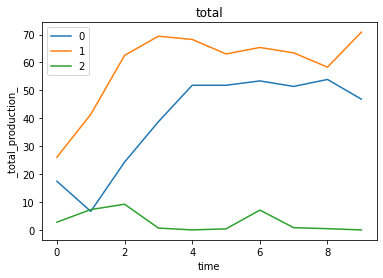

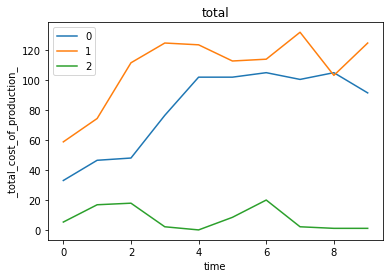

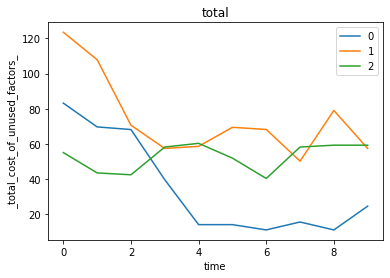

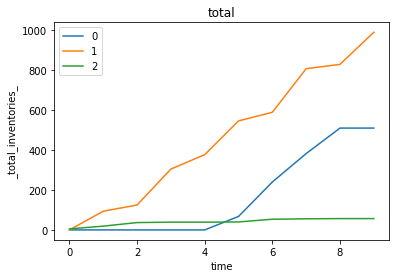

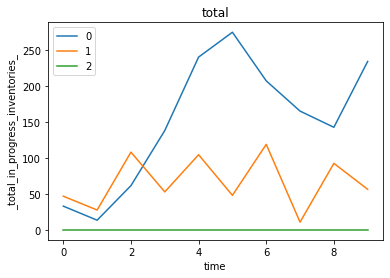

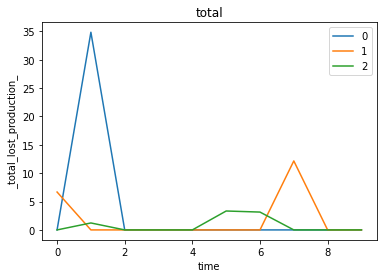

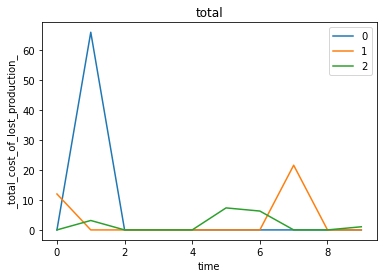

In [6]:
# totals
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a warning about open plots
    for name in names:
        display(name+", all ranks")
        display(data[name][-1])
        display("____________________________________________________________")
        data[name][-1].plot(title="total",xlabel="time",ylabel=name)